In [51]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import MaxPooling2D,UpSampling2D,Convolution2D,Input
import keras
from keras.models import Model
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2lab,lab2rgb
from keras.layers import Conv2D, UpSampling2D

In [52]:
cifar_data = tf.keras.datasets.cifar10.load_data()

In [53]:
(X,Y), (x,y) = cifar_data

In [54]:
X.shape

(50000, 32, 32, 3)

In [55]:
data = np.vstack((X,x))

In [56]:
data.shape

(60000, 32, 32, 3)

In [57]:
data_n = data/255

In [58]:
a=data_n.shape[0]

In [59]:
train,test,validation = data_n[:int(a*0.8)],data_n[int(a*0.8):int(a*0.9)],data_n[int(a*0.9):]

In [60]:
train.shape

(48000, 32, 32, 3)

In [61]:
test.shape

(6000, 32, 32, 3)

In [62]:
validation.shape

(6000, 32, 32, 3)

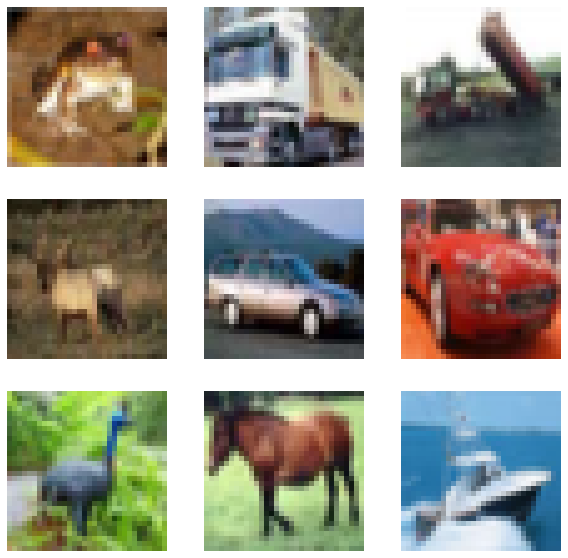

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(train[i])
  plt.axis("off")
i=+1

In [ ]:
#Base CAE model 
input = Input(shape=(32, 32,3), name="input")

x = Convolution2D(8, kernel_size=(3,3), padding='same', activation='relu', name= 'conv_1') (input)

x= MaxPooling2D(pool_size=(2,2), padding='same') (x)
x=  Convolution2D(12, kernel_size=(3,3), padding= 'same', activation='relu', name='conv_2') (x)
x= MaxPooling2D(pool_size=(2, 2), padding='same') (x)
x = Convolution2D(16, kernel_size=(3,3), padding='same', activation='relu', name= 'conv_3')(x)
x = UpSampling2D(size=(2, 2)) (x)
x = Convolution2D(12, kernel_size=(3,3), padding='same', activation='relu', name='conv_4') (x)
x= UpSampling2D(size=(2,2)) (x)


output = Convolution2D(filters=3, kernel_size=(3,3), padding='same', activation='relu', name='output')(x)

model= Model(inputs =input, outputs=output, name= 'CAE') 
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "CAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 16, 16, 12)        876       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 12)          0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 8, 8, 16)          1744      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 16)        0       

In [ ]:
history = model.fit(train,train,epochs=10,validation_data=(validation,validation))

Epoch 1/10
1500/1500 [==============================] - 41s 8ms/step - loss: 0.6217 - accuracy: 0.5605 - val_loss: 0.5963 - val_accuracy: 0.5383
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5760 - accuracy: 0.6091 - val_loss: 0.5714 - val_accuracy: 0.6190
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5730 - accuracy: 0.6123 - val_loss: 0.5690 - val_accuracy: 0.6610
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5713 - accuracy: 0.6191 - val_loss: 0.5806 - val_accuracy: 0.4689
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5710 - accuracy: 0.6292 - val_loss: 0.5685 - val_accuracy: 0.6521
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5778 - accuracy: 0.5697 - val_loss: 0.5698 - val_accuracy: 0.6568
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5729 - accuracy: 0.6030 - val_loss: 0.5679 - val_ac

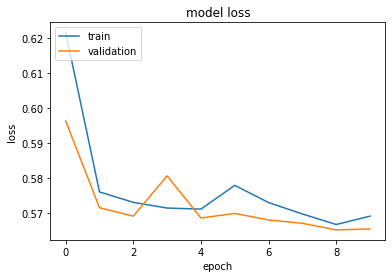

In [ ]:
# plot of the loss function
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


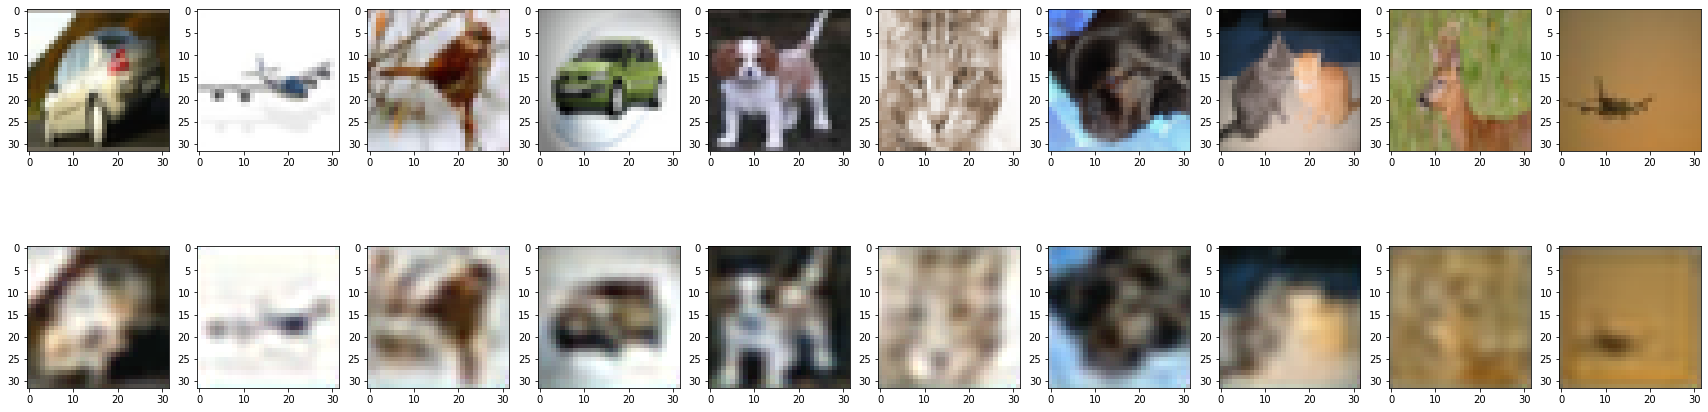

In [ ]:
#prediction on test set for the base model
output = model.predict(test)
n = 10 
plt.figure(figsize=(30, 8))
for i in range(n):
  ax= plt.subplot (2, n, i + 1)
  plt.imshow(test[i])
  ax = plt.subplot (2, n, i + 1 + n)
  plt.imshow(output[i])
plt.show() 

In [ ]:
#test error of the base model
test_loss, test_acc = model.evaluate(test, test)

188/188 [==============================] - 1s 4ms/step - loss: 0.5663 - accuracy: 0.6796


In [ ]:
#CAE with only 3 intermediate layers 
input = Input(shape=(32, 32,3), name="input")
x = Convolution2D(8, kernel_size=(3,3), padding='same', activation='relu', name= 'conv_1') (input)
x= MaxPooling2D(pool_size=(2,2), padding='same') (x)
x=  Convolution2D(10, kernel_size=(3,3), padding= 'same', activation='relu', name='conv_2') (x)
x = UpSampling2D(size=(2, 2)) (x)
x = Convolution2D(16, kernel_size=(3,3), padding='same', activation='relu', name='conv_3') (x)
output = Convolution2D(filters=3, kernel_size=(3,3), padding='same', activation='relu', name='output')(x)
model1= Model(inputs =input, outputs=output, name= 'CAE') 
model1.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "CAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 16, 16, 10)        730       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 32, 32, 10)        0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 32, 32, 16)        1456      
_________________________________________________________________
output (Conv2D)              (None, 32, 32, 3)         435     

In [ ]:
history1 = model1.fit(train,train,epochs=10, validation_data=(validation,validation))

Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5545 - accuracy: 0.7737 - val_loss: 0.5632 - val_accuracy: 0.6658
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5556 - accuracy: 0.7509 - val_loss: 0.5547 - val_accuracy: 0.7599
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5531 - accuracy: 0.7864 - val_loss: 0.5545 - val_accuracy: 0.8118
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5526 - accuracy: 0.7933 - val_loss: 0.5521 - val_accuracy: 0.7860
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5566 - accuracy: 0.7485 - val_loss: 0.5537 - val_accuracy: 0.7383
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5552 - accuracy: 0.7721 - val_loss: 0.5531 - val_accuracy: 0.8050
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5538 - accuracy: 0.7880 - val_loss: 0.5520 - val_ac

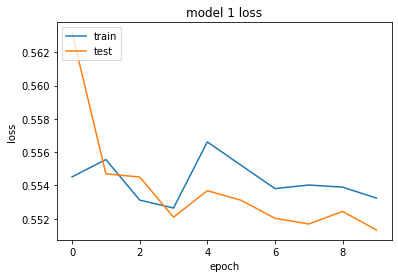

In [ ]:
#plot of the loss function
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


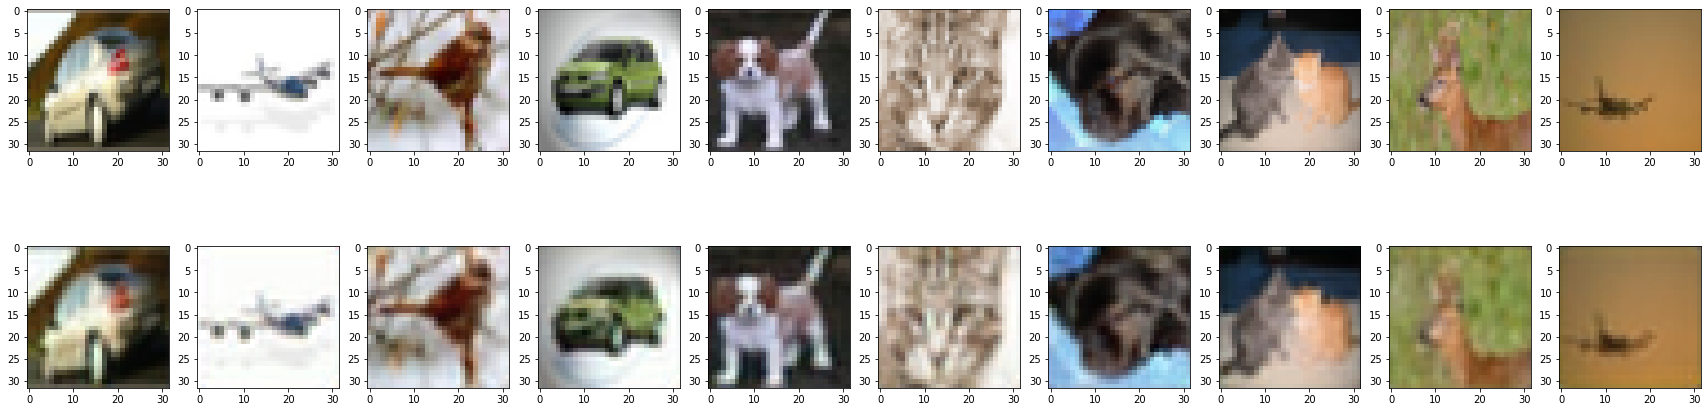

In [ ]:
#predictions on test set for CAE with 3 intermediate layers
output = model1.predict(test)
n = 10 
plt.figure(figsize=(30, 8))
for i in range(n):
  ax= plt.subplot (2, n, i + 1)
  plt.imshow(test[i])
  ax = plt.subplot (2, n, i + 1 + n)
  plt.imshow(output[i])
plt.show() 

In [ ]:
#test error of the CAE with 3 intermediate layers
test_loss, test_acc = model1.evaluate(test, test)

188/188 [==============================] - 1s 4ms/step - loss: 0.5522 - accuracy: 0.8317


In [67]:
# CAE different number of channels
input = Input(shape=(32, 32,3), name="input")

x = Convolution2D(4, kernel_size=(3,3), padding='same', activation='relu', name= 'conv_1') (input)

x= MaxPooling2D(pool_size=(2,2), padding='same') (x)
x=  Convolution2D(6, kernel_size=(3,3), padding= 'same', activation='relu', name='conv_2') (x)
x= MaxPooling2D(pool_size=(2, 2), padding='same') (x)
x = Convolution2D(10, kernel_size=(3,3), padding='same', activation='relu', name= 'conv_3')(x)
x = UpSampling2D(size=(2, 2)) (x)
x = Convolution2D(6,kernel_size=(3,3), padding='same', activation='relu', name='conv_4') (x)
x= UpSampling2D(size=(2,2)) (x)


output = Convolution2D(filters=3, kernel_size=(3,3), padding='same', activation='relu', name='output')(x)

model2= Model(inputs =input, outputs=output, name= 'CAE') 
model2.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

model2.summary()

Model: "CAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 32, 32, 4)         112       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 4)        0         
 2D)                                                             
                                                                 
 conv_2 (Conv2D)             (None, 16, 16, 6)         222       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 6)          0         
 2D)                                                             
                                                                 
 conv_3 (Conv2D)             (None, 8, 8, 10)          550     

In [68]:
history2 = model2.fit(train,train,epochs=10,  validation_data=(validation,validation))

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.6292 - accuracy: 0.3702 - val_loss: 0.5901 - val_accuracy: 0.3770
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5915 - accuracy: 0.3855 - val_loss: 0.5872 - val_accuracy: 0.4040
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5884 - accuracy: 0.3906 - val_loss: 0.5859 - val_accuracy: 0.3976
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5830 - accuracy: 0.5004 - val_loss: 0.5803 - val_accuracy: 0.5361
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5780 - accuracy: 0.6063 - val_loss: 0.5739 - val_accuracy: 0.6507
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5809 - accuracy: 0.5938 - val_loss: 0.5876 - val_accuracy: 0.4767
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5765 - accuracy: 0.6216 - val_loss: 0.5733 - val_ac

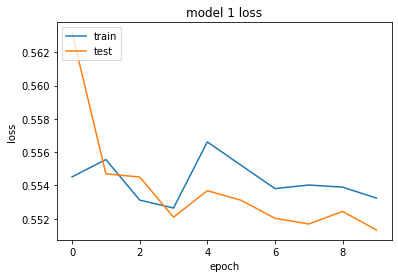

In [ ]:
# summarize history for loss of CAE with different numbers of channels
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


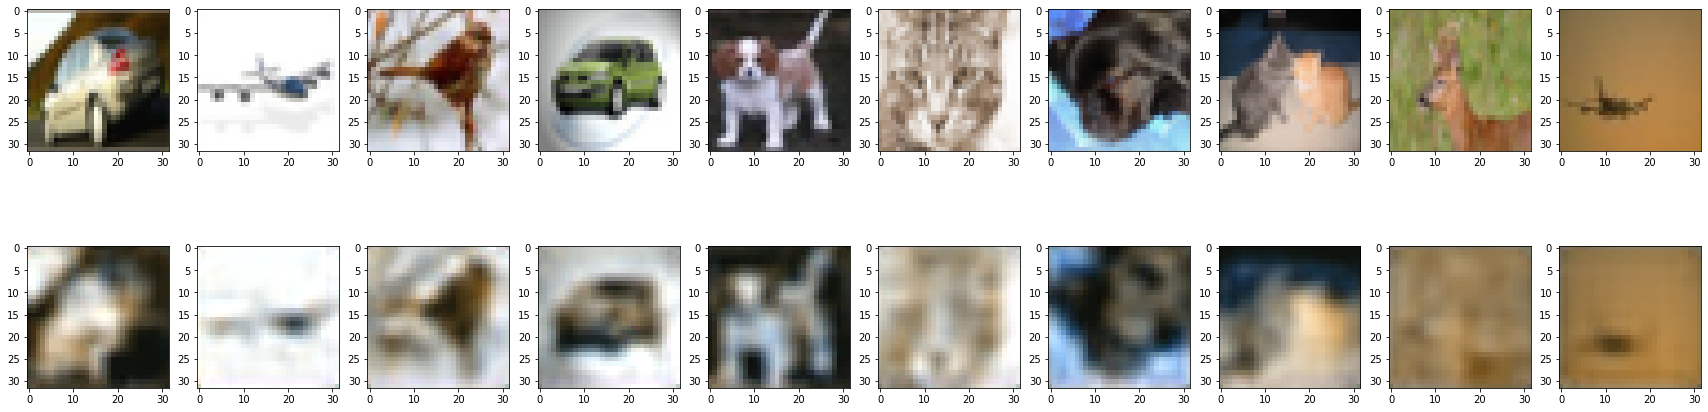

In [ ]:
#predictions on test set for CAE with different numbers of channels
output = model2.predict(test)
n = 10 
plt.figure(figsize=(30, 8))
for i in range(n):
  ax= plt.subplot (2, n, i + 1)
  plt.imshow(test[i])
  ax = plt.subplot (2, n, i + 1 + n)
  plt.imshow(output[i])
plt.show()

In [ ]:
#test error of CAE with different numbers of channels
test_loss, test_acc = model2.evaluate(test, test)

188/188 [==============================] - 1s 4ms/step - loss: 0.5671 - accuracy: 0.6494


In [64]:
#model function to apply different filter sizes
def def_mod(rgb,filter,pad):
  input = Input(shape=(32, 32,rgb), name="input")

  x = Convolution2D(8, kernel_size=filter, padding=pad, activation='relu', name= 'conv_1') (input)
  x= MaxPooling2D(pool_size=(2,2), padding=pad) (x)
  x=  Convolution2D(12, kernel_size=filter, padding=pad, activation='relu', name='conv_2') (x)
  x= MaxPooling2D(pool_size=(2, 2), padding=pad) (x)
  x = Convolution2D(16, kernel_size=filter, padding=pad, activation='relu', name= 'conv_3')(x)
  x = UpSampling2D(size=(2, 2)) (x)
  x = Convolution2D(12, kernel_size=filter, padding=pad, activation='relu', name='conv_4') (x)
  x= UpSampling2D(size=(2,2)) (x)

  output = Convolution2D(3, kernel_size=filter, padding=pad, activation='relu', name='output')(x)

  model= Model(inputs =input, outputs=output, name= 'CAE') 
  model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [65]:
#CAE with 1 filter
model_f1=def_mod(rgb=3,filter=(1,1),pad='same')

In [66]:
model_f1.summary()

Model: "CAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 32, 32, 8)         32        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv_2 (Conv2D)             (None, 16, 16, 12)        108       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 12)         0         
 2D)                                                             
                                                                 
 conv_3 (Conv2D)             (None, 8, 8, 16)          208     

In [ ]:
history_f1=model_f1.fit(train,train,epochs=10,validation_data=(validation,validation))

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 1.2789 - accuracy: 0.5256 - val_loss: 0.5822 - val_accuracy: 0.6685
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5847 - accuracy: 0.6602 - val_loss: 0.5807 - val_accuracy: 0.6971
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5796 - accuracy: 0.7309 - val_loss: 0.5790 - val_accuracy: 0.7581
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5810 - accuracy: 0.7515 - val_loss: 0.5797 - val_accuracy: 0.7473
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5777 - accuracy: 0.8012 - val_loss: 0.5773 - val_accuracy: 0.8141
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5773 - accuracy: 0.8121 - val_loss: 0.5809 - val_accuracy: 0.7314
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5775 - accuracy: 0.8114 - val_loss: 0.5771 - val_accuracy

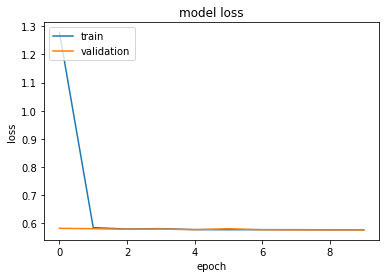

In [ ]:
# the plot of loss function
plt.plot(history_f1.history['loss'])
plt.plot(history_f1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


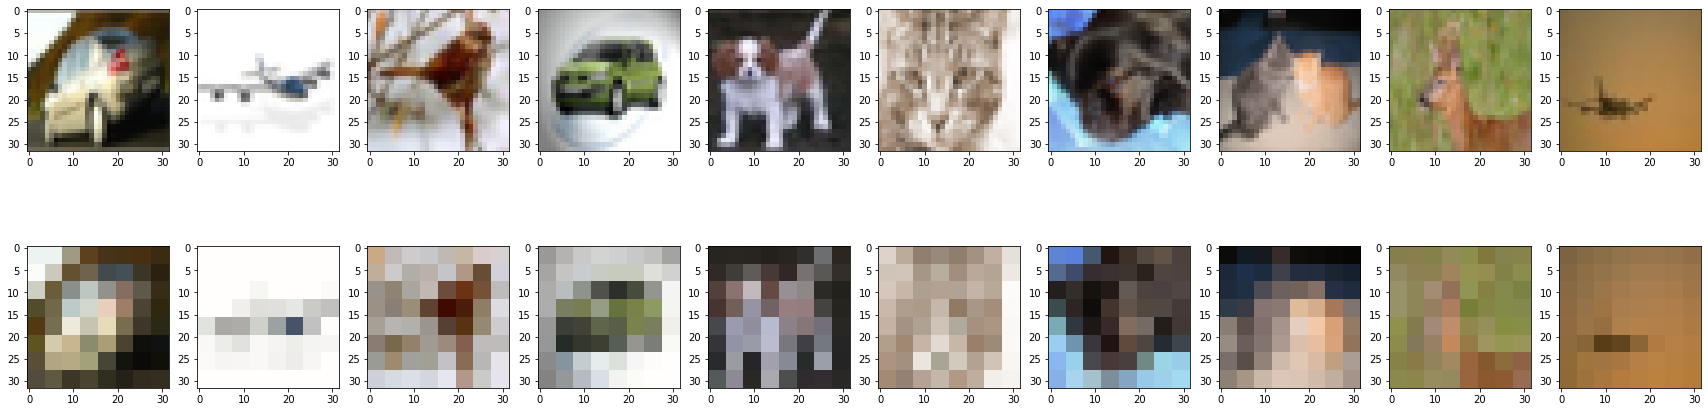

In [ ]:
#predictions on test set for CAE with 1 filter
output_f1 =model_f1.predict(test)
n = 10 
plt.figure(figsize=(30, 8))
for i in range(n):
  ax= plt.subplot (2, n, i + 1)
  plt.imshow(test[i])
  ax = plt.subplot (2, n, i + 1 + n)
  plt.imshow(output_f1[i])
plt.show()

In [ ]:
#test error of CAE  with 1 filter
test_loss, test_acc = model2.evaluate(test, test)

188/188 [==============================] - 1s 4ms/step - loss: 0.5671 - accuracy: 0.6494


In [ ]:
#CAE  with 5 filters
model_f5=def_mod(rgb=3,filter=(5,5),pad='same')

In [ ]:
history_f5=model_f5.fit(train,train,epochs=10,validation_data=(validation,validation))

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.6094 - accuracy: 0.4744 - val_loss: 0.5808 - val_accuracy: 0.5676
Epoch 2/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.5845 - accuracy: 0.5158 - val_loss: 0.5907 - val_accuracy: 0.5441
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5905 - accuracy: 0.5416 - val_loss: 0.6066 - val_accuracy: 0.3268
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5846 - accuracy: 0.5067 - val_loss: 0.5763 - val_accuracy: 0.5975
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5855 - accuracy: 0.4482 - val_loss: 0.5788 - val_accuracy: 0.4885
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5898 - accuracy: 0.4811 - val_loss: 0.5829 - val_accuracy: 0.5073
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5804 - accuracy: 0.5471 - val_loss: 0.5783 - val_ac

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


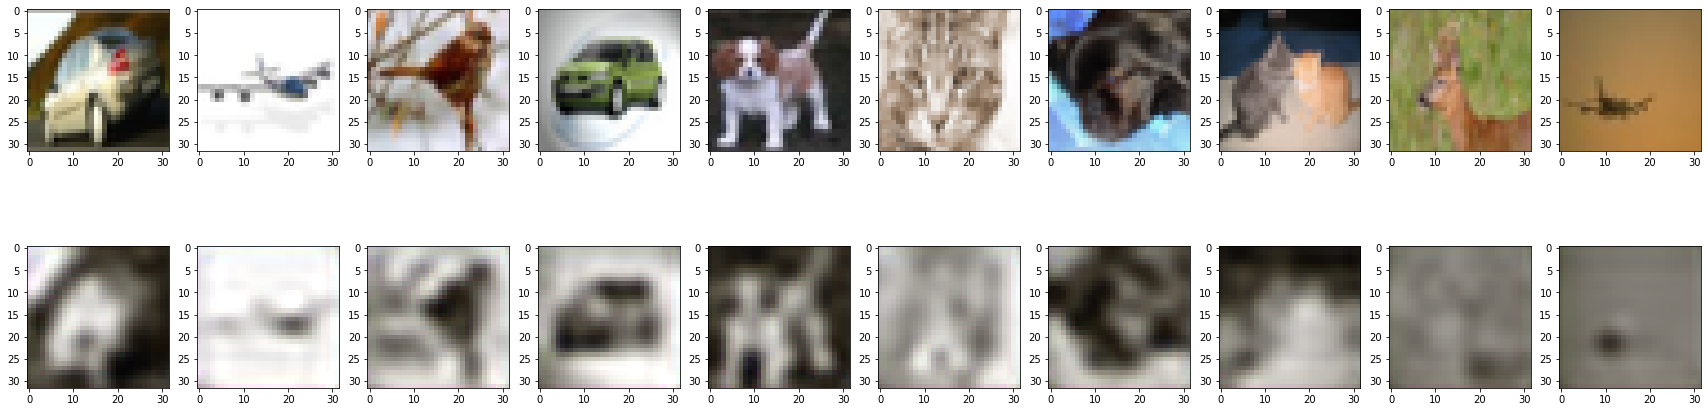

In [ ]:
#predictions on test set for CAE  with 5 filter
output_f5 =model_f5.predict(test)
n = 10 
plt.figure(figsize=(30, 8))
for i in range(n):
  ax= plt.subplot (2, n, i + 1)
  plt.imshow(test[i])
  ax = plt.subplot (2, n, i + 1 + n)
  plt.imshow(output_f5[i])
plt.show()

In [ ]:
#test error of CAE  with 5 filter
test_loss, test_acc = model_f5.evaluate(test, test)

188/188 [==============================] - 1s 5ms/step - loss: 0.5825 - accuracy: 0.4839


In [ ]:
#CAE with 7 filter
model_f7=def_mod(rgb=3,filter=(7,7),pad='same')

In [ ]:
history_f7=model_f7.fit(train,train,epochs=10,validation_data=(validation,validation))

Epoch 1/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.6161 - accuracy: 0.4150 - val_loss: 0.5860 - val_accuracy: 0.5519
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5924 - accuracy: 0.4758 - val_loss: 0.5825 - val_accuracy: 0.5197
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5965 - accuracy: 0.4829 - val_loss: 0.5875 - val_accuracy: 0.4565
Epoch 4/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.6781 - accuracy: 0.3085 - val_loss: 0.6912 - val_accuracy: 0.5099
Epoch 5/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.6910 - accuracy: 0.5093 - val_loss: 0.6911 - val_accuracy: 0.5099
Epoch 6/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.6910 - accuracy: 0.5093 - val_loss: 0.6911 - val_accuracy: 0.5099
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.6910 - accuracy: 0.5093 - val_loss: 0.6911 - 

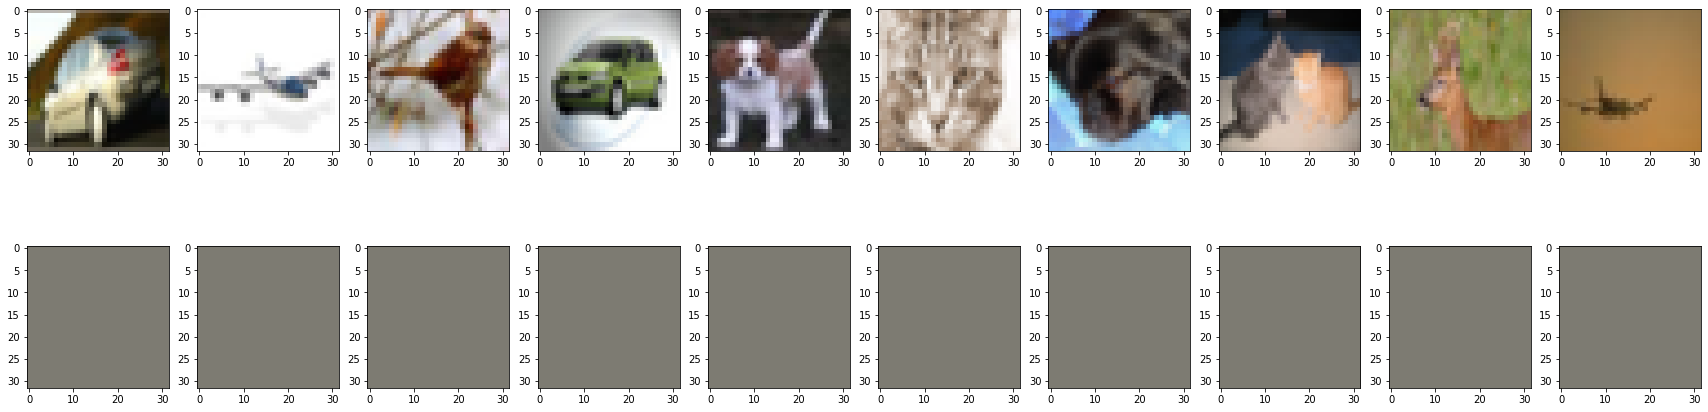

In [ ]:
#predictions on test set for CAE  with 7 filter
output_f7 =model_f7.predict(test)
n = 10 
plt.figure(figsize=(30, 8))
for i in range(n):
  ax= plt.subplot (2, n, i + 1)
  plt.imshow(test[i])
  ax = plt.subplot (2, n, i + 1 + n)
  plt.imshow(output_f7[i])
plt.show()

In [ ]:
#test error of CAE with 7 filter
test_loss, test_acc = model_f7.evaluate(test, test)

188/188 [==============================] - 1s 7ms/step - loss: 0.6916 - accuracy: 0.5088


In [36]:

#colorisation
# rgb is divided to luminance and chrominance parts
X =[]
Y =[]
for img in train:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) 
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)

(48000, 32, 32, 1)
(48000, 32, 32, 2)


In [37]:
Xv =[]
Yv =[]
for img in validation:
  try:
      lab = rgb2lab(img)
      Xv.append(lab[:,:,0]) 
      Yv.append(lab[:,:,1:] / 128)
  except:
     print('error')
Xv = np.array(Xv)
Yv = np.array(Yv)
Xv = Xv.reshape(Xv.shape+(1,))

In [41]:
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2,2), padding='same') )
model.add(Conv2D(12, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same') )
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(12, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3,3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 12)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          1744      
                                                                 
 up_sampling2d (UpSampling2D  (None, 16, 16, 16)      

In [42]:
history_c = model.fit(X,Y, epochs=10,validation_data=(Xv,Yv)) 

Epoch 1/10
1500/1500 [==============================] - 40s 7ms/step - loss: 0.0448 - accuracy: 0.3717 - val_loss: 0.0120 - val_accuracy: 0.3749
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0120 - accuracy: 0.3711 - val_loss: 0.0120 - val_accuracy: 0.3749
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0120 - accuracy: 0.3711 - val_loss: 0.0120 - val_accuracy: 0.3749
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0120 - accuracy: 0.3711 - val_loss: 0.0120 - val_accuracy: 0.3749
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0120 - accuracy: 0.3711 - val_loss: 0.0120 - val_accuracy: 0.3749
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0120 - accuracy: 0.3711 - val_loss: 0.0120 - val_accuracy: 0.3749
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0120 - accuracy: 0.3711 - val_loss: 0.0120 - val_ac

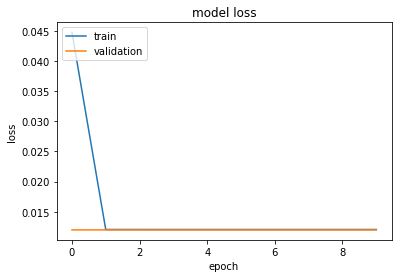

In [43]:
# the plot of loss function
plt.plot(history_c.history['loss'])
plt.plot(history_c.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [44]:
test_col = []
for i in test:
  lab = rgb2lab(i)
  test_col.append(lab[:,:,0])

test_col = np.array(test_col)

test_col = test_col.reshape(test_col.shape+(1,)) 

In [45]:
output = model.predict(test_col)
output = output*128

In [47]:
recolor_test = []
for i in range(0, 10):
  result = np.zeros((32,32,3))
  result[:,:,0] = test_col[i][:,:,0]
  result[:,:,1:] = output[i]
  recolor_test.append(lab2rgb(result))

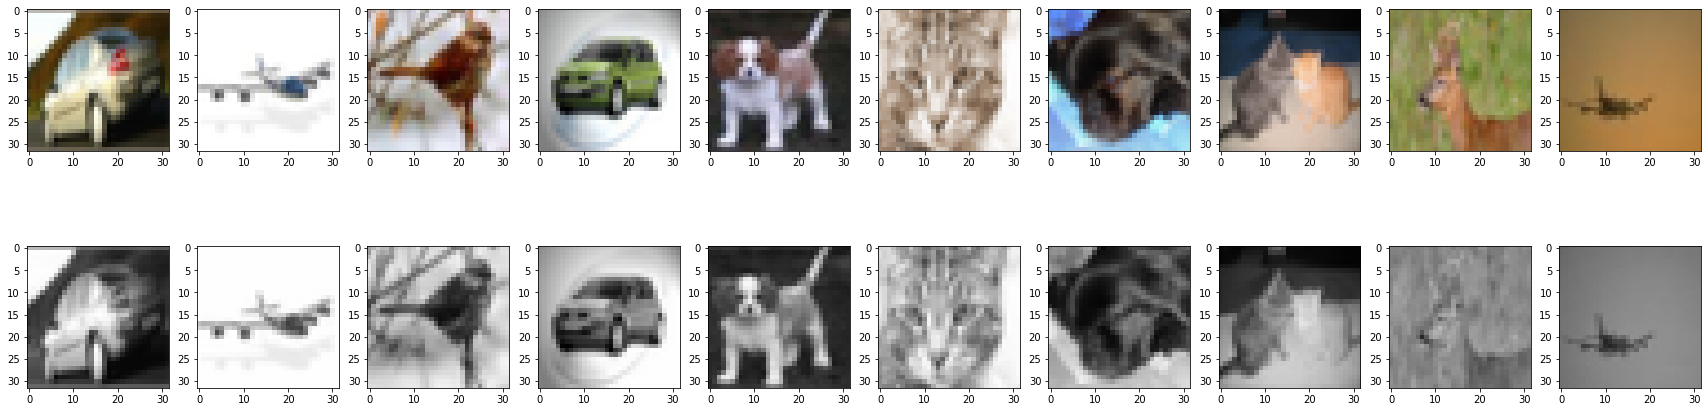

In [50]:
n = 10 
plt.figure(figsize=(30, 8))
for i in range(n):
  ax= plt.subplot (2, n, i + 1)
  plt.imshow(test[i])
  ax = plt.subplot (2, n, i + 1 + n)
  plt.imshow(recolor_test[i])
plt.show()

The first row has the original colour images. The second shows the slightly colorised greyscale images.